#***▶ Configuración Inicial y Descarga de Datos***

Este notebook realiza la exploración inicial del dataset Plant Pathology 2020
para clasificación de enfermedades en plantas.

*   Propósito: Subir el archivo kaggle.json para autenticación con Kaggle API
*   Resultado: Credenciales guardadas en el sistema

In [5]:
#Autenticación con Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"duvan0598","key":"dd66d6752e8b1194f147e8c526826508"}'}

In [6]:
#Instalación y configuración de Kaggle API
!pip install kaggle
# Crear carpeta para Kaggle
!mkdir -p ~/.kaggle
# Mover kaggle.json a la carpeta correcta
!mv kaggle.json ~/.kaggle/
# Cambiar permisos
!chmod 600 ~/.kaggle/kaggle.json



*   Propósito: Configurar el entorno de Kaggle para descargar datasets




In [7]:
# Descargar los datos de la competencia Plant Pathology 2020
!kaggle competitions download -c plant-pathology-2020-fgvc7

plant-pathology-2020-fgvc7.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
# Descomprimimos todo el dataset
with zipfile.ZipFile("plant-pathology-2020-fgvc7.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_data")

#***▶ Exploración Inicial del Dataset***

In [9]:
import pandas as pd                  #Manipulación de datos tabulares
import numpy as np                   #Operaciones numéricas
import os                            #Interacción con el sistema operativo
import matplotlib.pyplot as plt      #Visualización de datos
import seaborn as sns                #Visualización estadística
from PIL import Image                #Procesamiento de imágenes

In [10]:
#Cargar archivos CSV (train y test)
train_df = pd.read_csv("plant_data/train.csv")
test_df = pd.read_csv("plant_data/test.csv")

train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


Propósito: Cargar y examinar la estructura de los datos de entrenamiento y prueba
Estructura esperada:
- image_id: Identificador único de cada imagen
- healthy: Etiqueta (1=sana, 0=enferma)
- multiple_diseases: Etiqueta para enfermedades múltiples
- rust: Etiqueta para roya
- scab: Etiqueta para sarna

In [11]:
#Información general del Dataset
print("="*50)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print("Tamaño del train:", train_df.shape)
print("Tamaño del test:", test_df.shape)
print("\nInformación del dataset de entrenamiento:")
train_df.info()
print("\nEstadísticas descriptivas:")
train_df.describe()
train_df.describe()

INFORMACIÓN GENERAL DEL DATASET
Tamaño del train: (1821, 5)
Tamaño del test: (1821, 1)

Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB

Estadísticas descriptivas:


,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Propósito: Obtener información general sobre la estructura y calidad de los datos
Incluye:
- Dimensiones de los datasets
- Tipos de datos
- Valores nulos
- Estadísticas básicas de las columnas numéricas

/tmp/ipython-input-2128388564.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


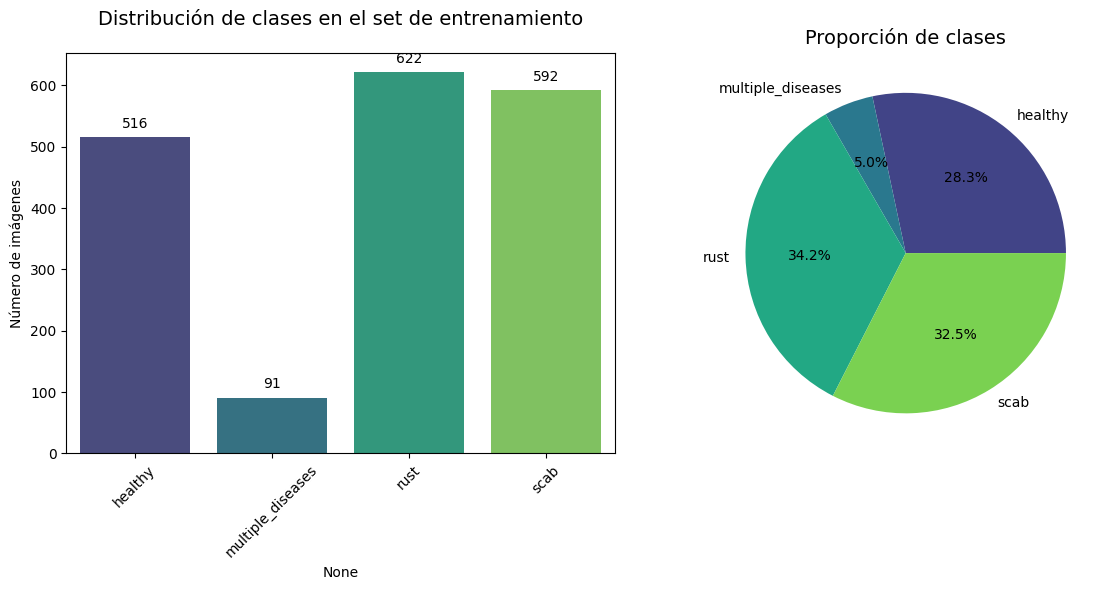


ANÁLISIS DE DISTRIBUCIÓN DE CLASES
Total de imágenes en entrenamiento: 1821

Conteo por clase:
healthy: 516 imágenes (28.34%)
multiple_diseases: 91 imágenes (5.00%)
rust: 622 imágenes (34.16%)
scab: 592 imágenes (32.51%)

Suma de todas las etiquetas: 1821
NOTA: Algunas imágenes pueden tener múltiples etiquetas (clases múltiples)


In [19]:
#Distribucion de clases
class_counts = train_df.iloc[:, 1:].sum()
total_images = len(train_df)

plt.figure(figsize=(12,6))

#Grafico de barras
plt.subplot(1, 2, 1)
bars = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Distribución de clases en el set de entrenamiento", fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Número de imágenes')

# Añadir valores en las barras
for i, v in enumerate(class_counts.values):
    bars.text(i, v + 10, str(v), ha='center', va='bottom')

# Gráfico de torta
plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Proporción de clases', fontsize=14)

plt.tight_layout()
plt.show()

# Análisis adicional de la distribución
print("\n" + "="*50)
print("ANÁLISIS DE DISTRIBUCIÓN DE CLASES")
print("="*50)
print(f"Total de imágenes en entrenamiento: {total_images}")
print("\nConteo por clase:")
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f"{class_name}: {count} imágenes ({percentage:.2f}%)")

print(f"\nSuma de todas las etiquetas: {class_counts.sum()}")
print("NOTA: Algunas imágenes pueden tener múltiples etiquetas (clases múltiples)")

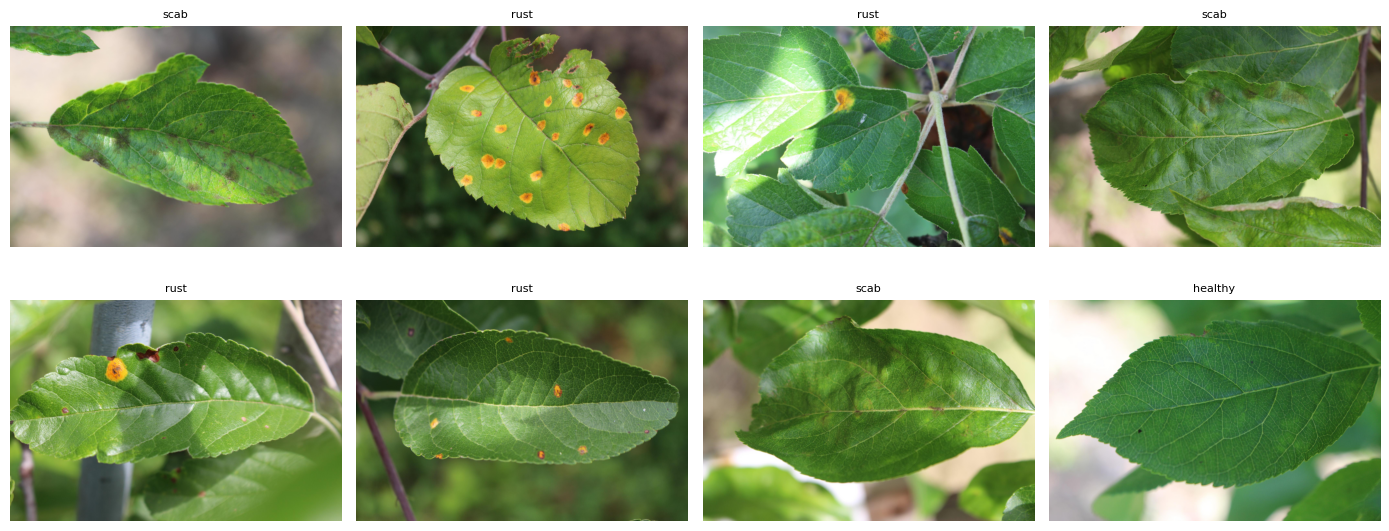

In [21]:
#Mostrar imagenes de ejemplo
image_dir = "plant_data/images"

def show_sample_images(df, num=8):
    plt.figure(figsize=(14,6))
    sample = df.sample(num)
    for i, (_, row) in enumerate(sample.iterrows()):
        img_path = os.path.join(image_dir, row['image_id'] + ".jpg")
        img = Image.open(img_path)
        plt.subplot(2, num//2, i+1)
        plt.imshow(img)
        plt.axis("off")
        title = ", ".join([col for col in df.columns[1:] if row[col] == 1])
        plt.title(title, fontsize=8)
    plt.tight_layout()
    plt.show()

show_sample_images(train_df, num=8)

In [ ]:
#Tamaño y resolucion de algunas imagenes
import numpy as np

def get_image_info(df, n=20):
    sizes = []
    for _, row in df.sample(n).iterrows():
        img_path = os.path.join(image_dir, row['image_id'] + ".jpg")
        img = Image.open(img_path)
        sizes.append(img.size)
    return sizes

sizes = get_image_info(train_df, 20)
sizes

[(2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365)]

In [ ]:
#Verificación de imágenes corruptas o faltantes
missing = []

for _, row in train_df.iterrows():
    path = os.path.join(image_dir, row['image_id'] + ".jpg")
    if not os.path.exists(path):
        missing.append(path)

missing[:5], len(missing)

([], 0)

In [25]:
# Verificación de integridad
def check_data_integrity():
    """
    Verifica la integridad de los datos
    """
    print("="*50)
    print("VERIFICACIÓN DE INTEGRIDAD DE DATOS")
    print("="*50)

    # Verificar que todas las imágenes existen
    train_images_exist = []
    for img_id in train_df['image_id']:
        img_path = os.path.join(image_dir, img_id + ".jpg")
        train_images_exist.append(os.path.exists(img_path))

    test_images_exist = []
    for img_id in test_df['image_id']:
        img_path = os.path.join(image_dir, img_id + ".jpg")
        test_images_exist.append(os.path.exists(img_path))

    print(f"Imágenes de entrenamiento encontradas: {sum(train_images_exist)}/{len(train_df)}")
    print(f"Imágenes de prueba encontradas: {sum(test_images_exist)}/{len(test_df)}")

    # Verificar que cada imagen tenga exactamente una etiqueta
    label_sums = train_df.iloc[:, 1:].sum(axis=1)
    single_label = (label_sums == 1).sum()
    multiple_labels = (label_sums > 1).sum()
    no_labels = (label_sums == 0).sum()

    print(f"\nDistribución de etiquetas por imagen:")
    print(f"  - Una etiqueta: {single_label} imágenes")
    print(f"  - Múltiples etiquetas: {multiple_labels} imágenes")
    print(f"  - Sin etiquetas: {no_labels} imágenes")

    if no_labels > 0:
        print("¡ADVERTENCIA: Hay imágenes sin etiquetas!")

    return all(train_images_exist) and all(test_images_exist)

# Ejecutar verificación de integridad
data_ok = check_data_integrity()

# Celda 12: RESUMEN EJECUTIVO
print("="*70)
print("RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS COMPLETADA")
print("="*70)

print(f"✓ Dataset: Plant Pathology 2020 - FGVC7")
print(f"✓ Imágenes de entrenamiento: {len(train_df)}")
print(f"✓ Imágenes de prueba: {len(test_df)}")
print(f"✓ Clases: {list(train_df.columns[1:])}")
print(f"✓ Distribución de clases: {dict(class_counts)}")
print(f"✓ Integridad de datos: {'✓ OK' if data_ok else '✗ PROBLEMAS'}")
print(f"✓ Directorio de imágenes: {image_dir}")

VERIFICACIÓN DE INTEGRIDAD DE DATOS
Imágenes de entrenamiento encontradas: 1821/1821
Imágenes de prueba encontradas: 1821/1821

Distribución de etiquetas por imagen:
  - Una etiqueta: 1821 imágenes
  - Múltiples etiquetas: 0 imágenes
  - Sin etiquetas: 0 imágenes
RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS COMPLETADA
✓ Dataset: Plant Pathology 2020 - FGVC7
✓ Imágenes de entrenamiento: 1821
✓ Imágenes de prueba: 1821
✓ Clases: ['healthy', 'multiple_diseases', 'rust', 'scab']
✓ Distribución de clases: {'healthy': np.int64(516), 'multiple_diseases': np.int64(91), 'rust': np.int64(622), 'scab': np.int64(592)}
✓ Integridad de datos: ✓ OK
✓ Directorio de imágenes: plant_data/images
